# Gráficas con los datos preprocesados

In [1]:
import numpy as np
#np.set_printoptions(threshold='nan')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Para abrir Explorador de archivos
from tkinter import Tk 
from tkinter.filedialog import askopenfilename
from tkinter import re #operaciones de matching de expresiones regulares

In [2]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):
    #data import
    data = pd.read_csv(path1).values
    amp = data[1:len(data),1:91]

    #plt
    fig = plt.figure(figsize = (18,15))
    ax1 = plt.subplot(311)
    plt.imshow(amp[:,0:29].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax1.set_title("Antenna A")
    plt.colorbar()

    ax2 = plt.subplot(312)
    plt.imshow(amp[:,30:59].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax2.set_title("Antenna B")
    plt.colorbar()

    ax3 = plt.subplot(313)
    plt.imshow(amp[:,60:89].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax3.set_title("Antenna C")
    plt.colorbar()
    plt.show()
    
    # Initializing valiables
    constant_offset = np.empty_like(amp)
    filtered_data = np.empty_like(amp)

    # Calculating the constant offset (moving average 20 seconds)
    for i in range(1, len(amp[0])):
        constant_offset[:,i] = moving_average(amp[:,i], len(amp[0]))

    # Calculating the filtered data (substract the constant offset)
    filtered_data = amp - constant_offset

    # Smoothing (moving average 0.01 seconds)
    for i in range(1, len(amp[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    # Calculate correlation matrix (90 * 90 dim)
    cov_mat2 = np.cov(filtered_data.T)
    # Calculate eig_val & eig_vec
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)
    # Sort the eig_val & eig_vec
    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]
    # Calculate H * eig_vec
    pca_data2 = filtered_data.dot(eig_vec2)
    
    #xmin = 0
    #xmax = 20000
    # plt
    fig3 = plt.figure(figsize = (18,30))

    ax1 = plt.subplot(611)
    plt.plot(pca_data2[:,0])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,0])
    ax1.set_title("PCA 1st component")

    ax2 = plt.subplot(612)
    plt.plot(pca_data2[:,1])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    ax3 = plt.subplot(613)
    plt.plot(pca_data2[:,2])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    ax4 = plt.subplot(614)
    plt.plot(pca_data2[:,3])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,3])
    ax4.set_title("PCA 4th component")

    ax5 = plt.subplot(615)
    plt.plot(pca_data2[:,4])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,4])
    ax5.set_title("PCA 5th component")

    ax6 = plt.subplot(616)
    plt.plot(pca_data2[:,5])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,5])
    ax6.set_title("PCA 6th component")

    plt.show()
    
    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(611)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(612)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(613)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(614)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(615)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,4], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.subplot(616)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,5], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.show()
    """
    plt.figure(figsize = (18,10))
    ax = plt.subplot(111)
    ax.magnitude_spectrum(pca_data2[:,0], Fs=1000, scale='dB', color='C1')
    # ax.magnitude_spectrum(pca_data2[5000:7500,0], Fs=1000, color='C1')
    plt.xlim(0,100)
    plt.ylim(0,1000)
    plt.show()
    """
    return [cov_mat2, eig_val2, eig_vec2, pca_data2]

## Se solicita el archivo csv

In [3]:
root = Tk() #Elimina la ventana de Tkinter
root.withdraw() #Ahora se cierra
file_path = askopenfilename() #Se abre el explorador de archivos y se guarda la selección
splitted = file_path.split("/")
file_name = splitted[-1]

In [4]:
#Se añaden los encabezados
csv_headers = "csi_headers.csv"
csv_cols = pd.read_csv(csv_headers)[1:91]
csv_col_list = csv_cols["Column_Names"].tolist()

In [5]:
folder_name = file_path.replace(file_name,'') 

## Nombre del archivo

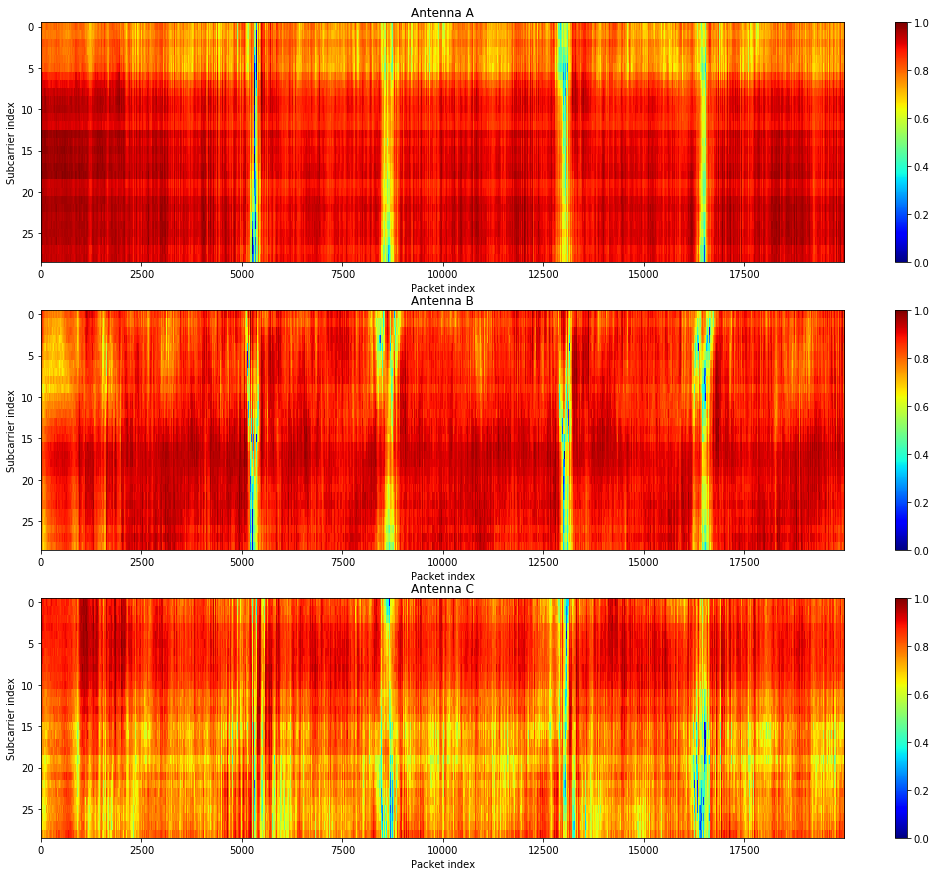

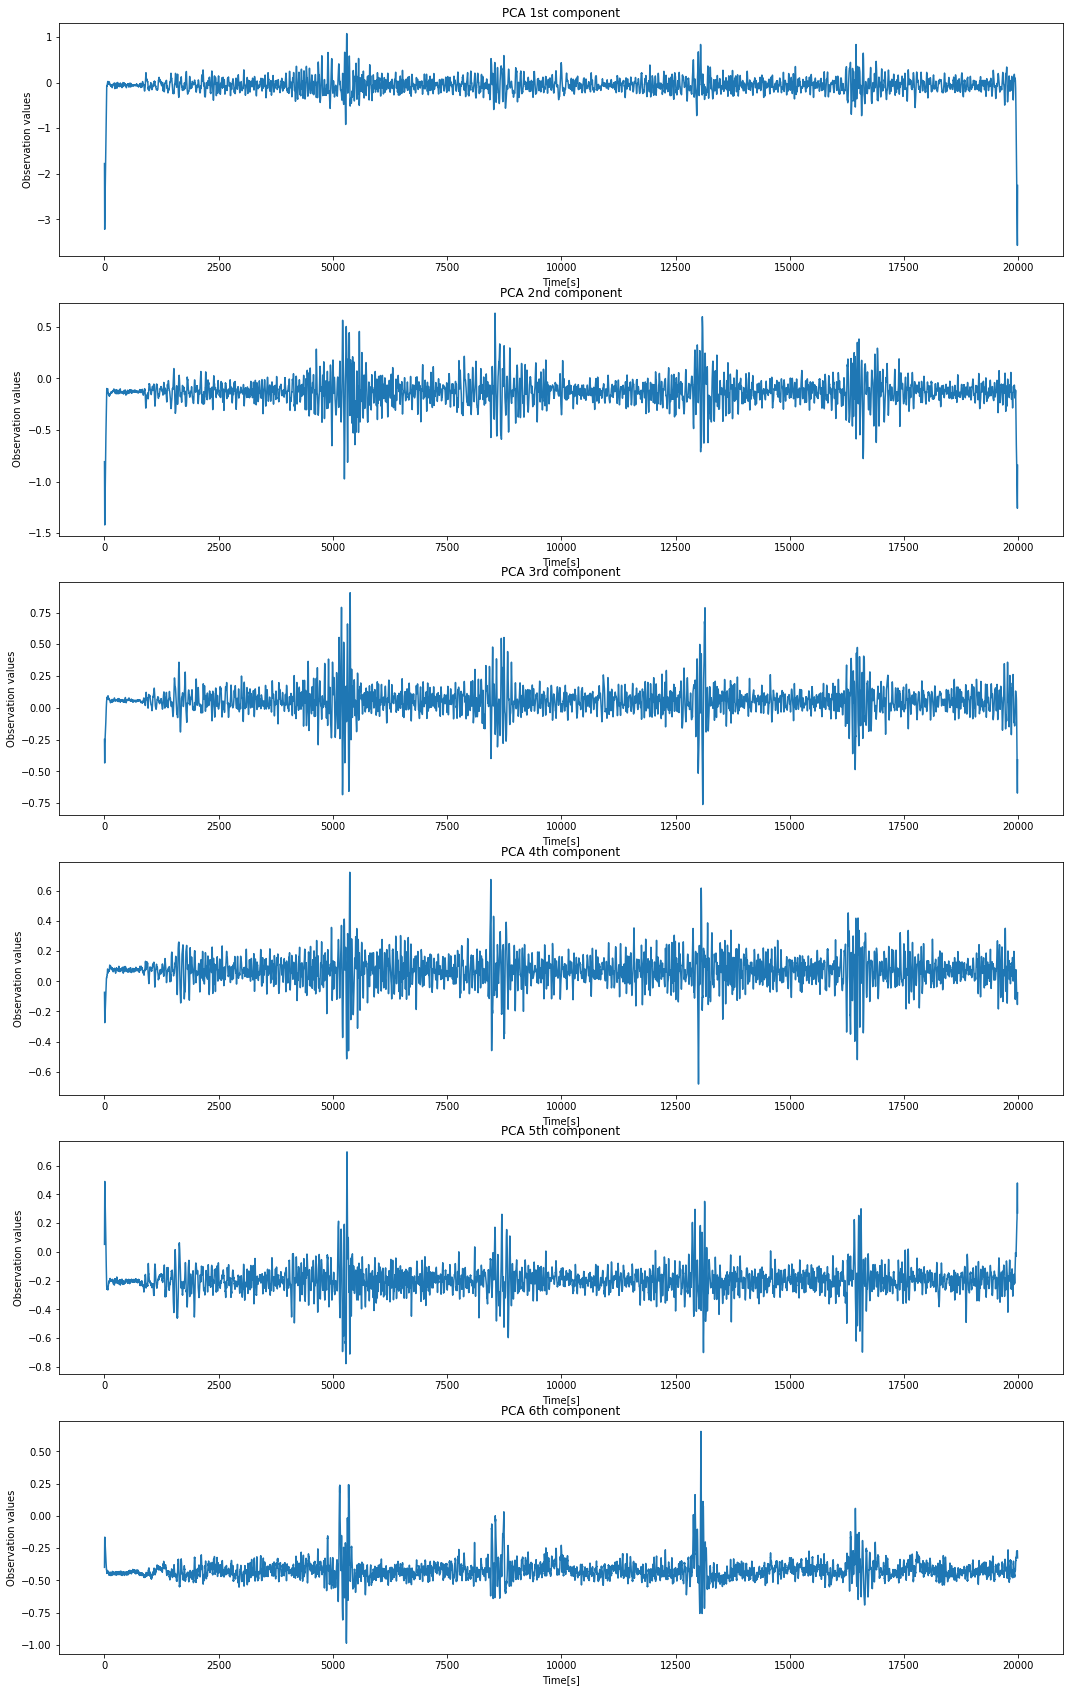

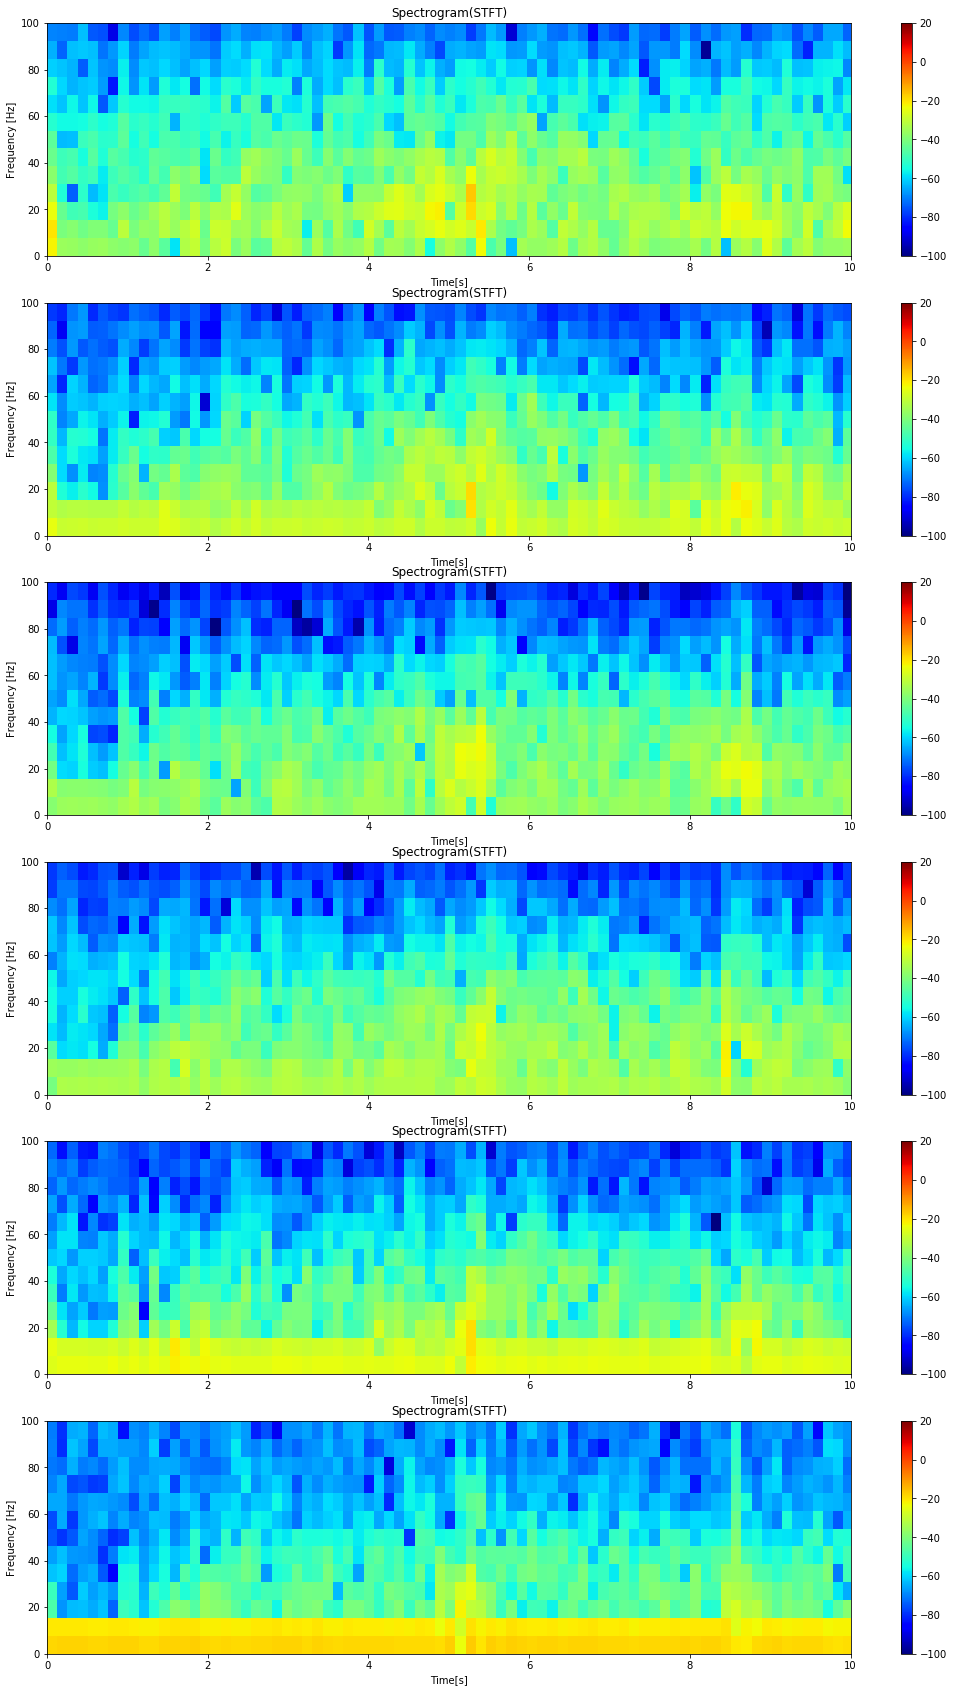

In [6]:
[cov_mat2, eig_val2, eig_vec2, pca_data2]= visualize(path1 = folder_name + "/" + file_name)

In [7]:
pca_data2

array([[-1.77632212e+00, -8.07386127e-01, -2.48559616e-01, ...,
         1.14537449e-03, -1.53504351e-03, -2.43020186e-03],
       [-2.07868887e+00, -9.31890912e-01, -2.89021036e-01, ...,
         1.58170372e-03, -1.91414944e-03, -2.30265454e-03],
       [-2.37472894e+00, -1.05013509e+00, -3.31315240e-01, ...,
         1.59539631e-03, -2.14688731e-03, -2.18991614e-03],
       ...,
       [-2.93160535e+00, -1.05789094e+00, -5.44622067e-01, ...,
         2.68094399e-03, -1.14001934e-03,  3.15576848e-04],
       [-2.59908957e+00, -9.51177061e-01, -4.78023677e-01, ...,
         2.50481917e-03, -1.08858147e-03,  4.02499284e-04],
       [-2.25713416e+00, -8.42133417e-01, -4.08547641e-01, ...,
         2.12395558e-03, -7.82655783e-04,  4.36946948e-04]])

In [8]:
pcaDataFrame = pd.DataFrame(pca_data2, columns=csv_col_list)

In [9]:
pcaDataFrame

,antena_1_amp_sub1,antena_1_amp_sub2,antena_1_amp_sub3,antena_1_amp_sub4,antena_1_amp_sub5,antena_1_amp_sub6,antena_1_amp_sub7,antena_1_amp_sub8,antena_1_amp_sub9,antena_1_amp_sub10,...,antena_3_amp_sub21,antena_3_amp_sub22,antena_3_amp_sub23,antena_3_amp_sub24,antena_3_amp_sub25,antena_3_amp_sub26,antena_3_amp_sub27,antena_3_amp_sub28,antena_3_amp_sub29,antena_3_amp_sub30
0,-1.776322,-0.807386,-0.248560,-0.073062,0.052610,-0.399409,0.048688,0.579357,0.142880,-0.126790,...,0.003502,-0.000336,-0.000986,-0.001641,-0.003390,-0.004619,0.004661,0.001145,-0.001535,-0.002430
1,-2.078689,-0.931891,-0.289021,-0.117125,0.141293,-0.335664,0.062665,0.541099,0.139704,-0.099218,...,0.003802,-0.000611,-0.000308,-0.001348,-0.002680,-0.004139,0.004842,0.001582,-0.001914,-0.002303
2,-2.374729,-1.050135,-0.331315,-0.158139,0.232041,-0.266247,0.075873,0.494904,0.136536,-0.068753,...,0.003915,-0.001023,-0.000012,-0.000858,-0.002711,-0.003893,0.004961,0.001595,-0.002147,-0.002190
3,-2.667801,-1.175408,-0.367499,-0.192036,0.304347,-0.233757,0.090521,0.487942,0.138733,-0.053517,...,0.004058,-0.001297,0.000236,-0.000489,-0.002843,-0.003397,0.005274,0.001394,-0.002020,-0.002533
4,-2.947072,-1.294800,-0.401313,-0.223723,0.371994,-0.204800,0.101425,0.483573,0.141477,-0.038304,...,0.004213,-0.001604,-0.000051,-0.000422,-0.003179,-0.003581,0.005535,0.001097,-0.002003,-0.002740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,-3.571346,-1.259172,-0.670042,-0.154177,0.479883,-0.271392,0.255262,0.446329,0.085917,-0.089243,...,0.001979,0.000576,-0.002711,-0.000036,0.001993,-0.000685,0.003161,0.001918,-0.001743,-0.000469
19984,-3.255175,-1.159502,-0.609207,-0.136335,0.431885,-0.285860,0.234422,0.448052,0.088473,-0.096359,...,0.002158,0.000241,-0.002235,-0.000301,0.001919,-0.000933,0.003530,0.002282,-0.001658,-0.000129
19985,-2.931605,-1.057891,-0.544622,-0.116912,0.380320,-0.303245,0.215872,0.454296,0.090979,-0.106091,...,0.002046,-0.000293,-0.001952,-0.000277,0.001921,-0.000727,0.004083,0.002681,-0.001140,0.000316
19986,-2.599090,-0.951177,-0.478024,-0.097056,0.328900,-0.312784,0.196384,0.451749,0.091699,-0.111897,...,0.001797,-0.000238,-0.001586,0.000165,0.001868,-0.000242,0.004542,0.002505,-0.001089,0.000402


In [10]:
pcaDataFrame.to_csv(r''+ 'pca' +'\pca_' + file_name, index = False, header=True)